## Spam and Ham Classifier Using NLP

Achieved an average accuracy of 97 % using Random Forest Classifier

## Importing Libraries


In [1]:
import nltk
import pandas as pd
import numpy as np

In [2]:
fullCorpus =pd.read_csv('SMSSpamCollection.tsv',sep='\t',header=None)

In [3]:
fullCorpus.columns = ['label','body_text']

In [4]:
fullCorpus

,label,body_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
# What is the shape of the dataset?
print ('Input file has {} rows and {} columns'.format(len(fullCorpus) , len(fullCorpus.columns)))

Input file has 5572 rows and 2 columns


In [6]:
# How many spam and ham are there?
print('Out of {} rows, there are {} spams and {} hams'.format( len(fullCorpus),
                                                            len(fullCorpus[fullCorpus['label']=='spam']),
                                                            len(fullCorpus[fullCorpus['label']=='ham'])))

Out of 5572 rows, there are 747 spams and 4825 hams


In [7]:
# how much missing data?
print('Number of missing rows in labels {}'.format (fullCorpus['label'].isnull().sum()))
print('Number of missing rows in texts {}'.format (fullCorpus['body_text'].isnull().sum()))

Number of missing rows in labels 0
Number of missing rows in texts 0


## Remove Punctuation

In [8]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
def remove_punct(text):
    text_nonpunct= "".join ([ char for char in text if char not in string.punctuation ])
    return text_nonpunct

fullCorpus['body_text_nonpunct']= fullCorpus['body_text'].apply(lambda x: remove_punct(x))

In [10]:
fullCorpus.head()

,label,body_text,body_text_nonpunct
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


## Remove Tokenization

In [11]:
import re

def tokenize(text):
    tokens= re.findall('[a-zA-Z]+',text)
    return tokens

fullCorpus['body_text_notokens']= fullCorpus['body_text_nonpunct'].apply(lambda x: tokenize(x.lower()))

In [12]:
fullCorpus.head()

,label,body_text,body_text_nonpunct,body_text_notokens
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


## Remove Stopwords

In [13]:
stopword= nltk.corpus.stopwords.words('english')

In [14]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

fullCorpus['body_text_nostop']= fullCorpus['body_text_notokens'].apply(lambda x: remove_stopwords(x))

In [15]:
fullCorpus.head()

,label,body_text,body_text_nonpunct,body_text_notokens,body_text_nostop
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."


## Cleaning the text

In [16]:
ps= nltk.PorterStemmer()

In [17]:
def clean_text(text):
    text= "".join ([ char for char in text if char not in string.punctuation ])
    tokens= re.findall('[a-zA-Z]+',text)
    text = [ps.stem(word.lower()) for word in tokens if word not in stopword]
    return text

fullCorpus['Clean_text']=fullCorpus['body_text'].apply(lambda x: clean_text(x) )

In [18]:
fullCorpus.head()

,label,body_text,body_text_nonpunct,body_text_notokens,body_text_nostop,Clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, wkly, comp, win, fa, cup, final,...","[free, entri, wkli, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, i, dont, think, goe, usf, live, around, ..."


In [19]:
fullCorpus= fullCorpus.drop(['body_text_nonpunct','body_text_notokens','body_text_nostop'],axis=1)

In [20]:
fullCorpus.head()

,label,body_text,Clean_text
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entri, wkli, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, i, dont, think, goe, usf, live, around, ..."


## Apply Count Vectorizations

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
count_vect= CountVectorizer(analyzer=clean_text)
X_count= count_vect.fit_transform(fullCorpus['body_text'])


In [23]:
print(X_count.shape)
print(count_vect.get_feature_names())

(5572, 7177)
['a', 'aa', 'aah', 'aaniy', 'aaooooright', 'aathilov', 'aathiwher', 'ab', 'abbey', 'abdomen', 'abeg', 'abelu', 'aberdeen', 'abi', 'abil', 'abiola', 'abj', 'abl', 'abnorm', 'about', 'abouta', 'abroad', 'absenc', 'absolut', 'abstract', 'abt', 'abta', 'aburo', 'abus', 'ac', 'academ', 'acc', 'accent', 'accentur', 'accept', 'access', 'accid', 'accident', 'accommod', 'accommodationvouch', 'accomod', 'accordin', 'accordingli', 'accordinglyor', 'account', 'accumul', 'ach', 'achanammarakheshqatar', 'achiev', 'acid', 'acknowledg', 'acl', 'acnt', 'acoentri', 'across', 'acsmsreward', 'act', 'actin', 'action', 'activ', 'actor', 'actual', 'acwicmb', 'ad', 'adam', 'add', 'addamsfa', 'addi', 'addict', 'address', 'addressul', 'adewal', 'adi', 'adjust', 'admin', 'administr', 'admir', 'admiss', 'admit', 'admiti', 'ador', 'adp', 'adress', 'adrian', 'adrink', 'adsens', 'adult', 'advanc', 'adventur', 'advic', 'advis', 'advisor', 'ae', 'aeronaut', 'aeroplan', 'afew', 'affair', 'affect', 'affecti

In [24]:
X_counts_df= pd.DataFrame(X_count.toarray())

In [25]:
X_counts_df.columns= count_vect.get_feature_names()
X_counts_df

,a,aa,aah,aaniy,aaooooright,aathilov,aathiwher,ab,abbey,abdomen,...,zero,zf,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zs,zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Apply N-gram Vectorization

In [26]:
def clean_text(text):
    text= "".join ([ char for char in text if char not in string.punctuation ])
    tokens= re.findall('[a-zA-Z]+',text)
    text = " ".join([ps.stem(word.lower()) for word in tokens if word not in stopword])
    return text

fullCorpus['Clean_text']=fullCorpus['body_text'].apply(lambda x: clean_text(x) )

In [27]:
ngram_vect= CountVectorizer(ngram_range=(2,2))
X_count= ngram_vect.fit_transform(fullCorpus['Clean_text'])

In [28]:
print(X_count.shape)
print(ngram_vect.get_feature_names())

(5572, 32875)
['aa exhaust', 'aah bless', 'aah cuddl', 'aah speak', 'aaniy pudunga', 'aaooooright work', 'aathilov lot', 'aathiwher dear', 'ab sara', 'abbey happi', 'abdomen gyna', 'abeg make', 'abelu hav', 'aberdeen unit', 'abi how', 'abi hwkeep', 'abil listen', 'abil question', 'abj serv', 'abl anyth', 'abl atten', 'abl buy', 'abl come', 'abl deliv', 'abl dont', 'abl eat', 'abl fridayhop', 'abl get', 'abl give', 'abl go', 'abl ill', 'abl join', 'abl kid', 'abl late', 'abl met', 'abl pay', 'abl rais', 'abl repli', 'abl show', 'abl sleep', 'abnorm ill', 'about how', 'about itboth', 'about ltgt', 'about moro', 'about tonight', 'about what', 'abouta much', 'abroad lone', 'absenc gud', 'absolut love', 'abstract are', 'abt abt', 'abt alreadi', 'abt charact', 'abt dvg', 'abt event', 'abt function', 'abt half', 'abt if', 'abt leona', 'abt make', 'abt mei', 'abt movi', 'abt muz', 'abt row', 'abt syd', 'abt tat', 'abt tel', 'abt tht', 'abt trip', 'abt ur', 'abt whr', 'abta complimentari', 'abu

In [29]:
X_counts_df= pd.DataFrame(X_count.toarray())
X_counts_df.columns= ngram_vect.get_feature_names()
X_counts_df

,aa exhaust,aah bless,aah cuddl,aah speak,aaniy pudunga,aaooooright work,aathilov lot,aathiwher dear,ab sara,abbey happi,...,zf pmsg,zhong se,zindgi wo,zoe it,zoe join,zogtoriu stare,zoom cine,zouk with,zs subscript,zyada kisi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Apply TF-IDF Vectorizer

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
def clean_text(text):
    text= "".join ([ char for char in text if char not in string.punctuation ])
    tokens= re.findall('[a-zA-Z]+',text)
    text = [ps.stem(word.lower()) for word in tokens if word not in stopword]
    return text

fullCorpus['Clean_text']=fullCorpus['body_text'].apply(lambda x: clean_text(x) )

In [32]:
tfidf_vect= TfidfVectorizer(analyzer=clean_text)
X_count= tfidf_vect.fit_transform(fullCorpus['body_text'])
X_count

<5572x7177 sparse matrix of type '<class 'numpy.float64'>'
	with 52862 stored elements in Compressed Sparse Row format>

In [33]:
print(X_count.shape)
print(tfidf_vect.get_feature_names())

(5572, 7177)
['a', 'aa', 'aah', 'aaniy', 'aaooooright', 'aathilov', 'aathiwher', 'ab', 'abbey', 'abdomen', 'abeg', 'abelu', 'aberdeen', 'abi', 'abil', 'abiola', 'abj', 'abl', 'abnorm', 'about', 'abouta', 'abroad', 'absenc', 'absolut', 'abstract', 'abt', 'abta', 'aburo', 'abus', 'ac', 'academ', 'acc', 'accent', 'accentur', 'accept', 'access', 'accid', 'accident', 'accommod', 'accommodationvouch', 'accomod', 'accordin', 'accordingli', 'accordinglyor', 'account', 'accumul', 'ach', 'achanammarakheshqatar', 'achiev', 'acid', 'acknowledg', 'acl', 'acnt', 'acoentri', 'across', 'acsmsreward', 'act', 'actin', 'action', 'activ', 'actor', 'actual', 'acwicmb', 'ad', 'adam', 'add', 'addamsfa', 'addi', 'addict', 'address', 'addressul', 'adewal', 'adi', 'adjust', 'admin', 'administr', 'admir', 'admiss', 'admit', 'admiti', 'ador', 'adp', 'adress', 'adrian', 'adrink', 'adsens', 'adult', 'advanc', 'adventur', 'advic', 'advis', 'advisor', 'ae', 'aeronaut', 'aeroplan', 'afew', 'affair', 'affect', 'affecti

In [34]:
X_counts_df= pd.DataFrame(X_count.toarray())
X_counts_df.columns= tfidf_vect.get_feature_names()
X_counts_df

,a,aa,aah,aaniy,aaooooright,aathilov,aathiwher,ab,abbey,abdomen,...,zero,zf,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zs,zyada
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Apply feature Engineering

In [35]:
data =pd.read_csv('SMSSpamCollection.tsv',sep='\t',header=None)
data.columns = ['label','body_text']

### Create feature for text length

In [36]:
data['body_len']=data['body_text'].apply(lambda x: len(x) - x.count(" "))

In [37]:
data.head()

,label,body_text,body_len
0,ham,"Go until jurong point, crazy.. Available only ...",92
1,ham,Ok lar... Joking wif u oni...,24
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
3,ham,U dun say so early hor... U c already then say...,39
4,ham,"Nah I don't think he goes to usf, he lives aro...",49


### Create feature for % of text that is punctuation

In [38]:
def count_punct(text):
    count= sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100
    
    
data['punct %'] = data['body_text'].apply(lambda x: count_punct(x) )

In [39]:
data.tail()

,label,body_text,body_len,punct %
5567,spam,This is the 2nd time we have tried 2 contact u...,131,6.1
5568,ham,Will ü b going to esplanade fr home?,29,3.4
5569,ham,"Pity, * was in mood for that. So...any other s...",48,14.6
5570,ham,The guy did some bitching but I acted like i'd...,100,1.0
5571,ham,Rofl. Its true to its name,21,4.8


## Evaluate created Features

In [40]:
from matplotlib import pyplot as plt
%matplotlib inline

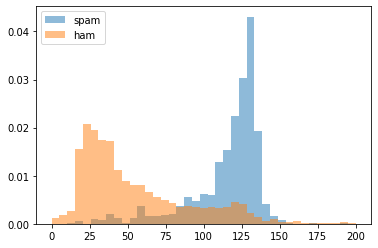

In [41]:
bins= np.linspace(0,200,40)
plt.hist(data[data['label']=='spam']['body_len'],bins,alpha=0.5, density= True, label='spam')
plt.hist(data[data['label']=='ham']['body_len'],bins,alpha=0.5, density= True, label='ham')
plt.legend(loc='upper left')
plt.show()

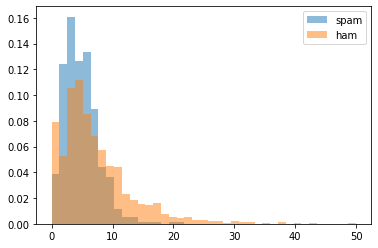

In [42]:
bins= np.linspace(0,50,40)
plt.hist(data[data['label']=='spam']['punct %'],bins,alpha=0.5, density= True, label='spam')
plt.hist(data[data['label']=='ham']['punct %'],bins,alpha=0.5, density= True, label='ham')
plt.legend(loc='upper right')
plt.show()

## Plotting full distribution

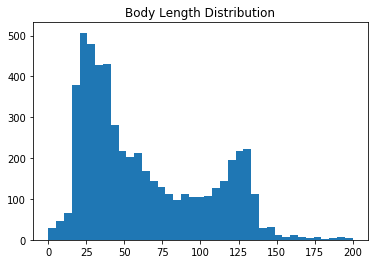

In [43]:
bins =np.linspace(0,200,40)

plt.hist(data['body_len'], bins)
plt.title('Body Length Distribution')
plt.show()

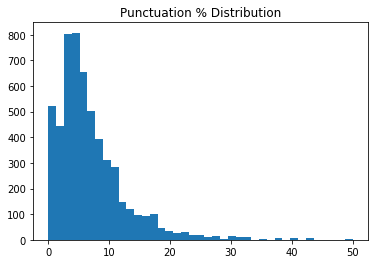

In [44]:
bins =np.linspace(0,50,40)

plt.hist(data['punct %'], bins)
plt.title('Punctuation % Distribution')
plt.show()

## Transform Features using BOX COX Power Transformations

#### Process :
1. Determine what range of exponents to test
2. Apply each transformations to each value of your chosen feature
3. Use some criteria to determine which of the transformations yield the best distribution

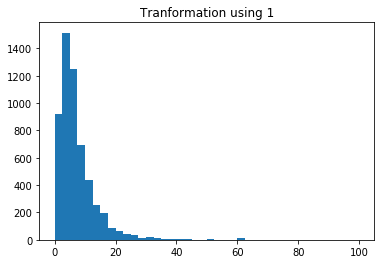

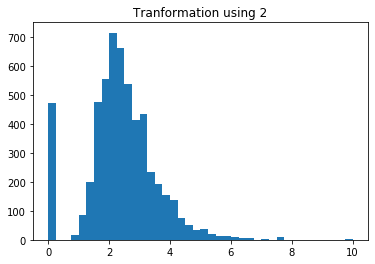

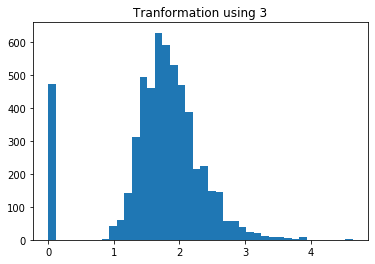

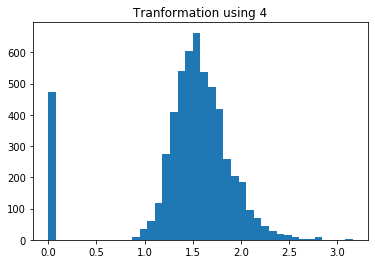

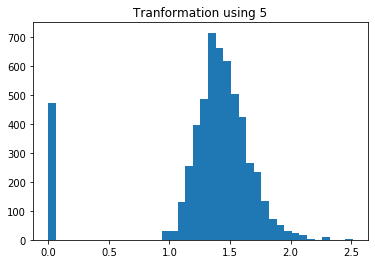

In [45]:
for i in np.arange(1,6):
    plt.hist((data['punct %'])**(1/i),bins=40)
    plt.title('Tranformation using {}'.format(str(i)))
    plt.show()

## Training Evaluating the dataset using Random Forest

In [46]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.findall('[a-zA-Z]', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

# TF-IDF
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
X_tfidf_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)

# CountVectorizer
count_vect = CountVectorizer(analyzer=clean_text)
X_count = count_vect.fit_transform(data['body_text'])
X_count_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_count.toarray())], axis=1)

X_count_feat.head()

,body_len,punct%,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,24,25.0,0,0,0,1,1,0,1,2,1,2,0,0,1,1,0,1,0,0
1,128,4.7,0,4,11,4,0,0,0,2,3,6,4,1,6,2,2,2,2,0
2,39,15.4,0,1,3,0,0,2,0,0,2,2,0,0,3,3,0,0,0,0
3,49,4.1,0,0,6,1,2,7,0,1,1,4,0,0,2,3,1,0,0,0
4,116,6.9,3,3,12,3,3,3,0,4,4,7,1,0,6,3,1,3,3,0


In [47]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [48]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_tfidf_feat, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,2.979226,0.082074,0.090555,0.013024,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.967713,0.965919,0.967684,0.959605,0.963163,0.964818,0.003089,1
11,6.986650,1.461884,0.174932,0.065902,None,300,"{'max_depth': None, 'n_estimators': 300}",0.965022,0.966816,0.965889,0.959605,0.964061,0.964279,0.002509,2
10,4.268285,0.623146,0.216353,0.089189,None,150,"{'max_depth': None, 'n_estimators': 150}",0.970404,0.964126,0.963196,0.958707,0.964061,0.964100,0.003733,3
2,5.788116,0.139117,0.186695,0.034080,30,300,"{'max_depth': 30, 'n_estimators': 300}",0.966816,0.963229,0.965889,0.958707,0.964960,0.963920,0.002863,4
5,6.350014,0.315694,0.217818,0.038268,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.965022,0.962332,0.964991,0.962298,0.964960,0.963920,0.001311,4


In [49]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_count_feat, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,3.751961,0.056769,0.214025,0.035137,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.966816,0.968610,0.966786,0.961400,0.963163,0.965356,0.002654,1
7,1.782557,0.362430,0.189773,0.089898,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.966816,0.967713,0.966786,0.961400,0.963163,0.965177,0.002451,2
8,5.337283,0.218217,0.246743,0.063021,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.966816,0.967713,0.969479,0.962298,0.959569,0.965177,0.003670,2
10,2.319997,0.274945,0.145604,0.048038,None,150,"{'max_depth': None, 'n_estimators': 150}",0.965022,0.967713,0.968582,0.961400,0.963163,0.965177,0.002697,2
2,3.668794,0.147868,0.187086,0.032181,30,300,"{'max_depth': 30, 'n_estimators': 300}",0.965919,0.966816,0.967684,0.958707,0.962264,0.964279,0.003341,5
